# LLM Finetuning

## Transformers
A python library that makes downloading and training ML models easy

### Sentiment Analysis with pipeline()
```python
pipeline(task="sentiment-analysis",
        model = "distilbert-base-uncased-finetuned-sst-2-english")("Love This")
# Output -> [{'label':'POSITIVE','score':0.99976459}]
```
> Other tasks: summarization, translation, question-answering, feature extraction(i.e. Text embedding), text generation, and more

Models ->>> [huggingface.co/models](huggingface.co/models)
- A growing repository of pre-trained open-source ML models for things such as NLP, CV, and more
- Refer: [YouTube-Blog/LLMs/hugging-face/](https://github.com/ShawhinT/YouTube-Blog/tree/main/LLMs/hugging-face)

Spaces ->>> [hf.co/spaces](huggingface.co/spaces)
- Git repositories hosted by Hugging face that allow you to make ML applications

## Prompt Engineering
- How to Trick AI into solving your problems
1. What is Prompt engineering
2. Two Levels of Prompt engineering
3. How to Build Apps with it
4. 7 Tricks for Prompt engineering
5. Example code: Automatic Grader with Langchain

### Prompt engineering is "the means by which LLMs are programmed with prompts."
1. The Easy way: ChatGPT (or Something similar)
2. The Hard way: Programmitcally

- Use case: Automatic Grader for high school history class
- Question: Who was the 35th president of the United States?
- Answer: John F. Kennedy, JFK, John Kennedy, Kennedy

> - Use LLM to handle logic via prompt engineering
```python
prompt_template = """
You are a high school history teacher grading homework assignments. Based on the homework question indicated by "Q:" and the correct answer indicated by "A.", your task is to determine whether the student's answer is correct. Grading is binary; therefore, student answers can be correct or wrong. Simple misspellings are okay

Q:{question}
A:{correct_answer}

Student_Answer: {student_answer}
"""
```

Trick 1: Be Descriptive (More is better) <br>
Trick 2: Give Example <br>
Trick 3: Use Structured data <br>
Trick 4: Chain of Thought <br>
Trick 5: Chatbot Prompts <br>
Trick 6: Flipped Approach <br>
Trick 7: Reflect, Review and Refine <br>

Refer: [LLMs/langchain-example](https://github.com/ShawhinT/YouTube-Blog/tree/main/LLMs/langchain-example)

- Optimal prompt strategies are model-dependent
- Not all pertinent information can fit in context window
- General-purpose model may be cost inefficient and even overkill
- A (smaller) specialized model can out-perform a (larger) general-purpose model

## Fine-tuning
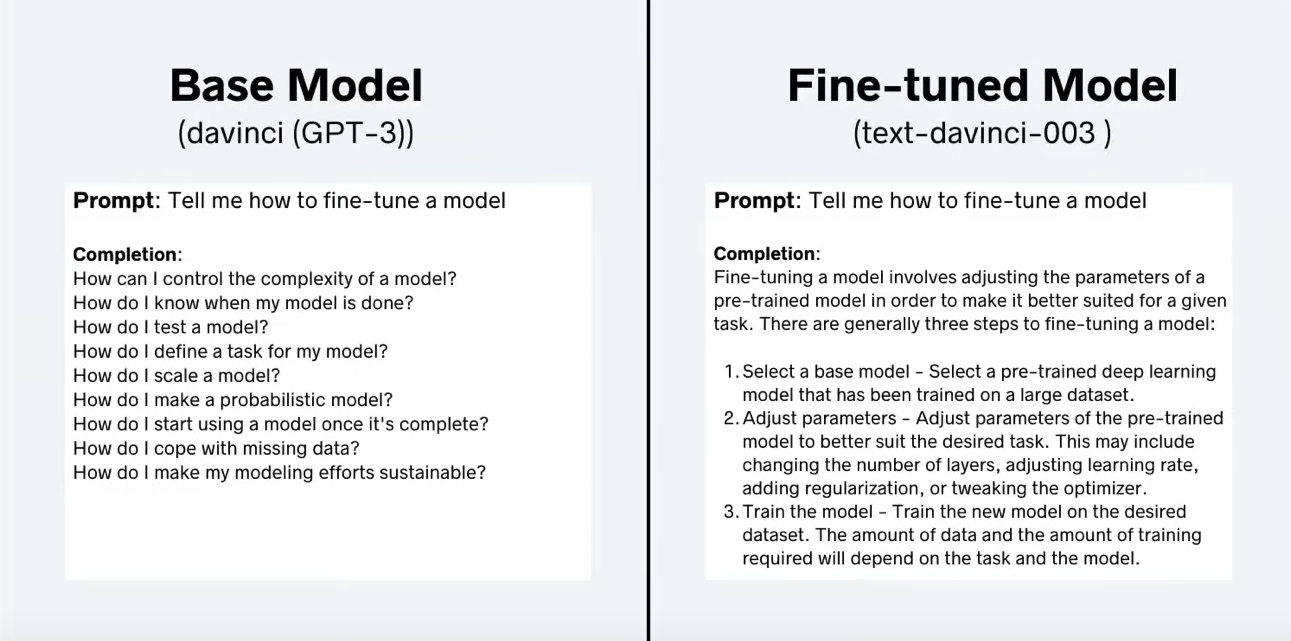

- A smaller(finetune) model like InstructGPT(1.3B) can outperform GPT-3(175B)


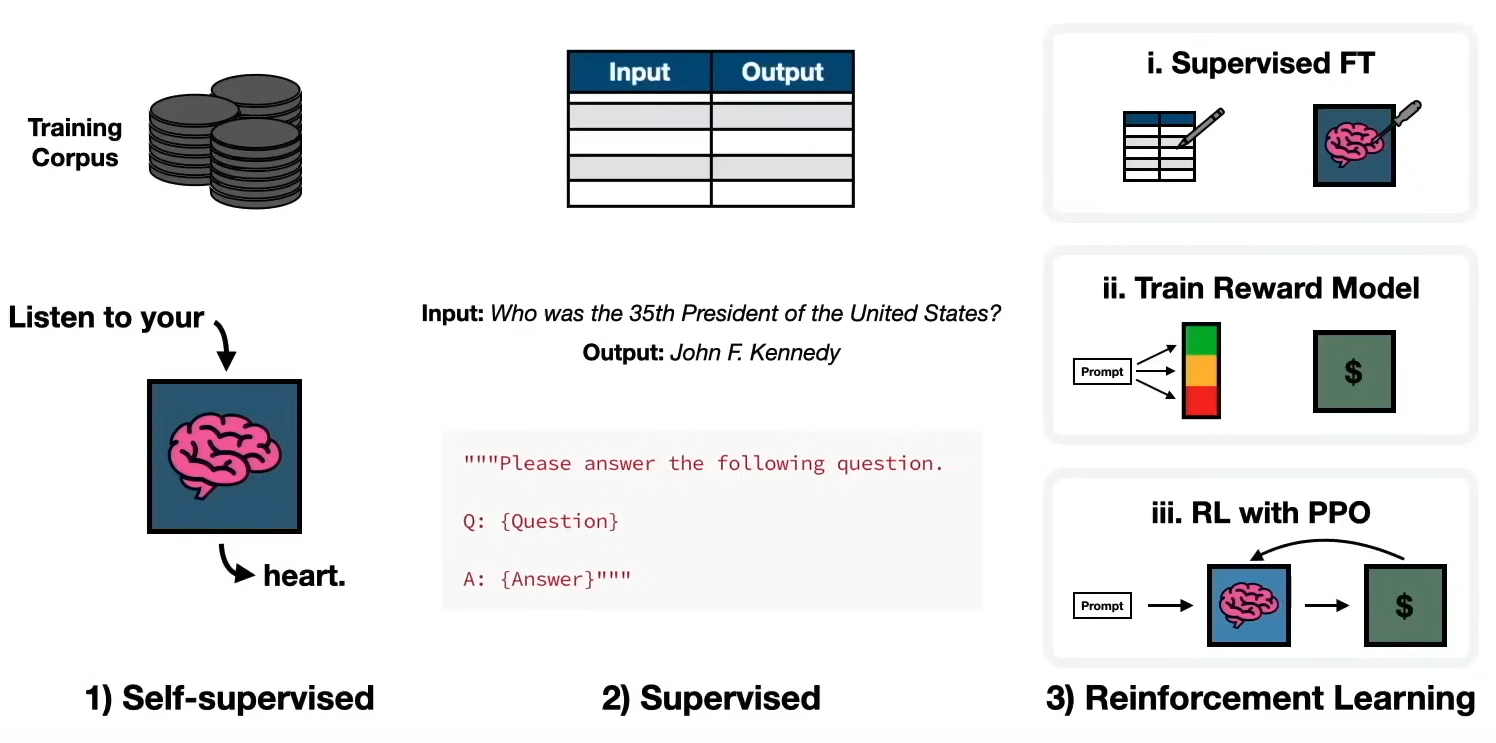


1. Choose a fine-tuning task
2. Prepare training dataset
3. Choose a base model
4. Fine-tune via supervised learning
5. Evaluate the model performance

> There are 3 options for Parameter Tuning
>
> * Retrain all parameters
> * Transfer learning by freezing parts of the neual network
> * Parameter Efficient Fine tuning or PEFT (Freeze the entire NN and augment with additional parameters which are trainable)

### LoRA (Low Rank Adaptation)
- Finetunes model by adding a new trainable parameters

## [Fine Tune Large Language Model (LLM) on a Custom Dataset with QLoRA](https://dassum.medium.com/fine-tune-large-language-model-llm-on-a-custom-dataset-with-qlora-fb60abdeba07)

`1. What is LLM Fine-Tuning?` <br>
- involves additiona training of a pre-existing model, which has previously acquired patterns and features from an extensive dataset, using a smaller, domain-specific dataset  <br>
`2. What are the challenges faced in training LLM from scratch`  <br>
- Training a LLM from ground up is highly resource instensive in terms of both computational power and time
`3. What is the main benefit of LLM Fine-Tuning?`
- Utilizing the existing knowledge embedded in the pre-trained model allows for achieving high performance on specific tasks with substantially reduced data and computational requirements

### Key steps involved in LLM Fine-Tuning:
1. Select a pre-trained model:
   - Select a base pre-trained model that aligns wih our desired architecture and functionalities
   - Pre-trained models are generic purpose models that have been trained on large corpus of unlabeled data
2. Gather relevant Dataset:
   - The dataset can be labeled or structured in a way that the model can learn from it
3. Preprocess Dataset:
   - Clean the dataset with missing and noisy data
   - Split it into training, validation and test sets
   - Ensure it is compatible with the model
4. Fine-Tuning:
   - The dataset which we will select might be related to a particular domain or application, allowing the model to adapt and specialize for that context
5. Task-specific adaptation:
   - During fine-tuning, model's parameters are adjusted based on the new dataset, helping it better understand and generate content relevant to the specific dataset.
   - This process retains the general language knowledge gained during pre-training while tailoring the model to the nuances of the target domain
- Fine-tuning LLMs helps leverage the knowledge encoded in pre-trained models for more specialized and domain-specific tasks

### Fine Tuning Methods

1. Full Fine Tuning (Instruction fine-tuning)
   * updates all model weights
   * creating new version with improved capablities
   * demands sufficient memory and computational resources
2. Parameter Efficient Fine-Tuning (PEFT)
   * updating only a subset of parameters, effectively "freezing" the rest
   * make memory requirements more manageable and preventing catastrophic foregetting
   * avoid the loss of previously learned information
   * LoRA & QLoRA

#### LoRA

Pre-trained LLM
      |
      v
Initiate LoRA Fine-tuning
      |
      v
Fine-tune LoRA Adapter
      |
      v
Combine LoRA Adapter with LLM for Inference
      |
      v
Enhanced Inference with Reduced Memory Requirement

1. **Start with Pre-trained Large Language Model (LLM)**
   - Original LLM weights remain unchanged throughout the process.

2. **Initiate LoRA Fine-tuning**
   - Define two smaller matrices (LoRA adapter) that will approximate the larger weight matrix of the LLM.
   - Only the LoRA adapter matrices are fine-tuned for a specific task or use case.

3. **Fine-tune LoRA Adapter**
   - Adjust the values in the LoRA adapter matrices through the fine-tuning process, optimizing for the specific task.

4. **Combine LoRA Adapter with Original LLM for Inference**
   - During inference, the fine-tuned LoRA adapter is combined with the original LLM.
   - The original LLM provides the foundational language capabilities, while the LoRA adapter tailors the model's responses to the specific task.

5. **Outcome: Enhanced Inference with Reduced Memory Requirement**
   - The original LLM remains unchanged, and a small, task-specific LoRA adapter is created.
   - The LoRA adapter is significantly smaller than the full LLM, often a single-digit percentage of the original size.
   - Multiple LoRA adapters can be created for different tasks and combined with the original LLM as needed, reducing the overall memory footprint compared to having multiple fully fine-tuned LLMs.

#### QLoRA
* represents a more memory-efficient iteration of LoRA
* quantizes the weights of the LoRA adapters (smaller matrices) to lower precision (e.g. 4-bit instead of 8-bit)
* further reduces the memory footprint & storage requirements
* pre-trained model is loaded into GPU memory with quantized 4-bit weights
* Despite this reduction in bit precision, QLoRA maintains a comparable level of effectiveness of LoRA

[Python notebook - Fine Tune Large Language Model (LLM) on a Custom Dataset with QLoRA](FT_LLM_QLoRA.ipynb)